# Hi 🙌 Bhagat surya here !!

## i am 18 doing data science let's explore together 
## email:bhagatsurya69@gmail.com

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Admission_Prediction.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


# Exploratory Data Analysis
In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA 

# taking null value in nested list 
this nested list meathod can exctract even you have 80 coloums 

In [4]:
null_value = [x for x in df.columns if df[x].isnull().sum()>1]

# filling null values 

In [5]:
for i in null_value:
    df[i].fillna(value=df[i].median(),inplace=True)

In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# checkind distubution of columns

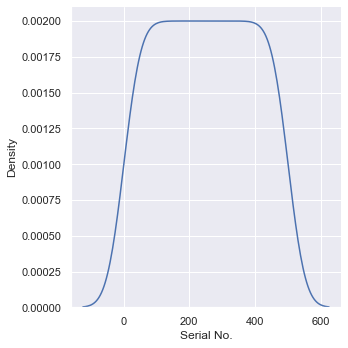

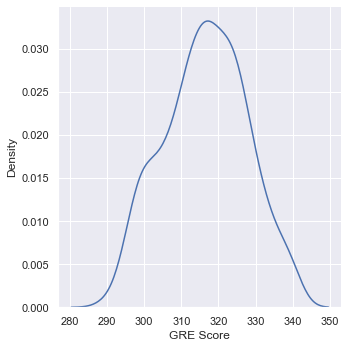

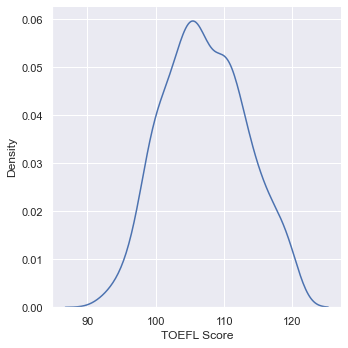

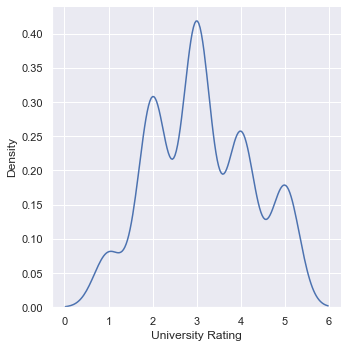

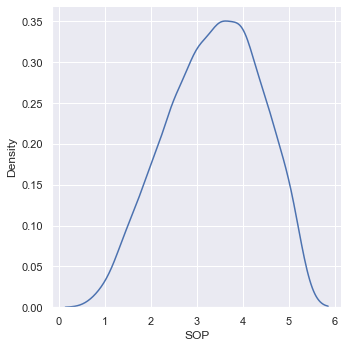

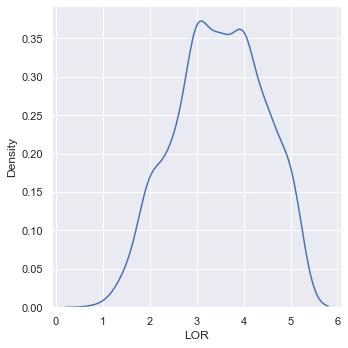

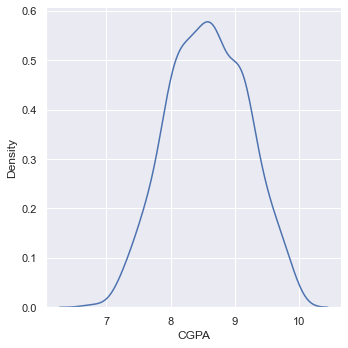

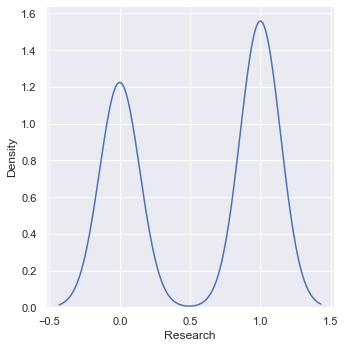

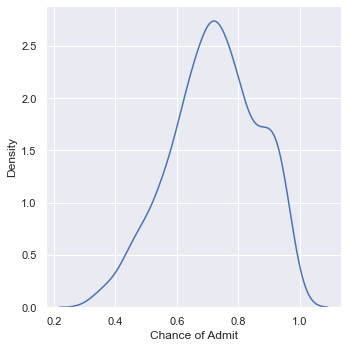

In [7]:
for i in df.columns:
    sns.displot(data=df,x=df[i],kind="kde")
    

# let check distibution beteen independ and depend 
i do't have grammely sorry

In [8]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,317.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


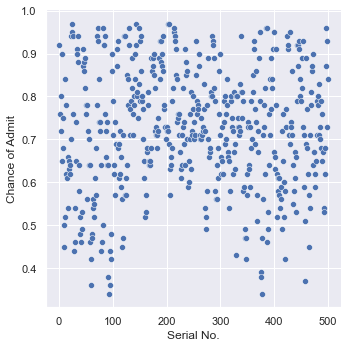

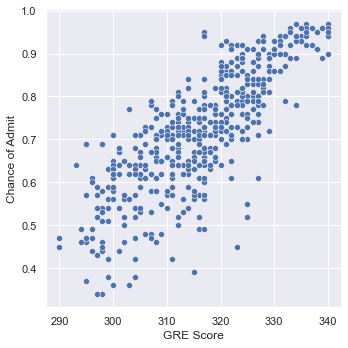

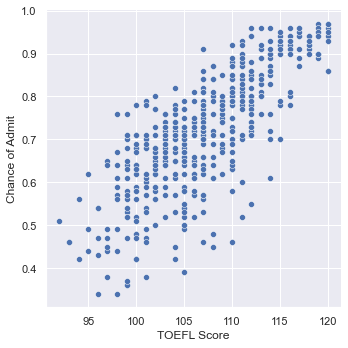

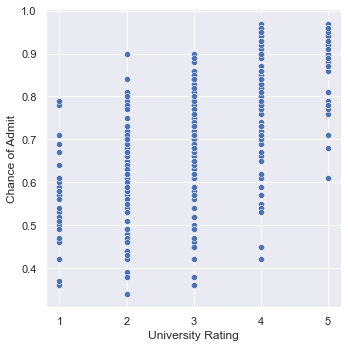

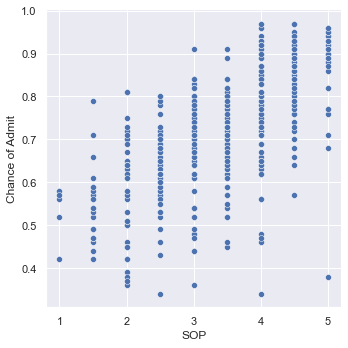

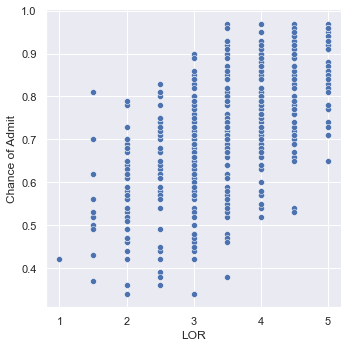

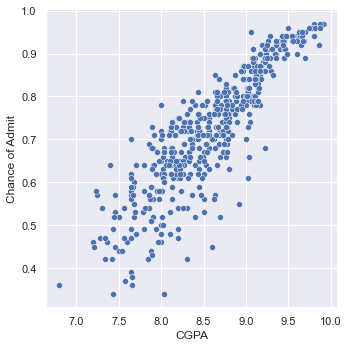

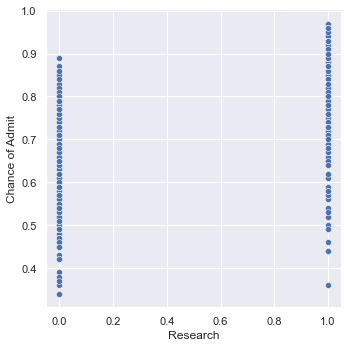

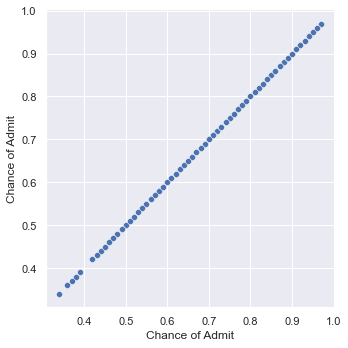

In [9]:
sns.set_theme(style="darkgrid")
for i in df.columns:
     sns.relplot(data=df,x=df[i],y='Chance of Admit')


# removing serial number 

In [10]:
df.drop(columns='Serial No.',inplace=True)

In [11]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,317.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


# suppreating indedent varable as x and dependent varable as y

In [12]:
y = df['Chance of Admit']

In [13]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [14]:
x = df.drop(columns=['Chance of Admit'])

In [15]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,317.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1
496,337.0,117.0,5.0,5.0,5.0,9.87,1
497,330.0,120.0,5.0,4.5,5.0,9.56,1
498,312.0,103.0,4.0,4.0,5.0,8.43,0


# scaling downe the independent frature as mean = 0, std = 1 with StandardScaler()


In [16]:
scaler = StandardScaler()
x_scaler= scaler.fit_transform(x)

In [17]:
x_scaler

array([[ 1.84150547,  1.78914648,  0.78200955, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66960557, -0.03043666,  0.78200955, ...,  1.09894429,
         0.48585943,  0.88640526],
       [ 0.03858255, -0.52668661, -0.10462259, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.21048245,  2.11997978,  1.66864169, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.41214818, -0.69210326,  0.78200955, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.94004401,  0.96206323,  0.78200955, ...,  1.09894429,
         0.76721964, -1.12815215]])

# variance_inflation_factor is used to find Multicollinearity
5 is the thume of rule

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
varable = x_scaler
vif  = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(varable, i) for i in range(varable.shape[1])]
vif["Features"] = x.columns

In [20]:
vif

,VIF,Features
0,4.154712,GRE Score
1,3.795794,TOEFL Score
2,2.517273,University Rating
3,2.776399,SOP
4,2.037378,LOR
5,4.653172,CGPA
6,1.458962,Research


In [32]:
import statsmodels.api as sm
regressor_OLS = sm.OLS(endog = y, exog = x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Chance of Admit   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              8146.
Date:                Fri, 28 Jan 2022   Prob (F-statistic):                        0.00
Time:                        21:05:55   Log-Likelihood:                          634.03
No. Observations:                 500   AIC:                                     -1254.
Df Residuals:                     493   BIC:                                     -1225.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score            -0.0030      0.000     -8.597      0.000      -0.004      -0.002
TOEFL Score           0.0031      0.001      3.148      0.002       0.001       0.005
University Rating     0.0152      0.004      3.615      0.000       0.007       0.023
SOP                   0.0092      0.005      1.796      0.073      -0.001       0.019
LOR                   0.0179      0.005      3.778      0.000       0.009       0.027
CGPA                  0.1352      0.011     12.439      0.000       0.114       0.157
Research              0.0547      0.007      7.860      0.000       0.041       0.068
==============================================================================
Omnibus:                       77.402   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.946
Skew:                          -0.959   Prob(JB):                     4.48e-28
Kurtosis:                       4.538   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# train test splite 

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,train_size=0.25,random_state=335)

# create Linear Regression model fit the data

In [23]:
Linear_Regression =LinearRegression()
Linear_Regression.fit(x_train,y_train)

LinearRegression()

# saving the model to the local file system

In [26]:
import pickle
filename = 'final_Linear_Regression_model.pickle'
pickle.dump(Linear_Regression, open(filename, 'wb'))

# prediction using the saved model

In [27]:
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.94044513])

In [37]:
Linear_Regression.score(x_train,y_train)

0.8263414883631808

# Let's create a function to create adjusted R-Squared

In [35]:
def adj_r2(x,y):
    r2 = Linear_Regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [36]:
adj_r2(x_test,y_test)

0.7895874467964329

In [40]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [41]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

4.444167396707035e-05

In [44]:
lasso = Lasso(alpha)
lasso_reg = lasso.fit(x_train,y_train)

In [45]:
lasso_reg.score(x_test, y_test)

0.7935128435833576

our r2_score for test data (75.34%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [46]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([8.32465101, 3.67468109, 1.83803574, 6.3549123 , 4.6745881 ,
       7.21237157, 2.67860785, 9.79079813, 9.03670276, 4.00813951,
       4.46608704, 5.20853671, 0.03891903, 6.92643111, 7.96381577,
       9.54339965, 5.21410672, 6.74192691, 9.47411417, 6.85164399,
       8.86271133, 3.50246882, 7.81694111, 2.06167952, 3.48564166,
       6.79011619, 0.23613442, 9.93505129, 9.9925089 , 6.62869055,
       2.07441535, 7.1917573 , 1.11260035, 4.49739548, 2.49445818,
       9.57853093, 2.43194891, 3.40107858, 8.35825941, 1.30845805,
       4.46954037, 6.79879891, 3.93810412, 6.01727363, 6.68413094,
       7.59274915, 6.32004896, 5.30823938, 5.14884033, 1.95783802]),
        cv=10, normalize=True)

In [47]:
ridgecv.alpha_

0.2361344154396905

In [48]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.2361344154396905)

In [49]:
ridge_model.score(x_test, y_test)

0.7933643073225798

# we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

In [51]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [52]:
elasticCV.alpha_

0.0015175416001449679

In [53]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [54]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [56]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)
elasticnet_reg.score(x_test, y_test)

0.793107396092572

# So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.